In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from WindPy import *
w.start()
%matplotlib inline

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2021 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


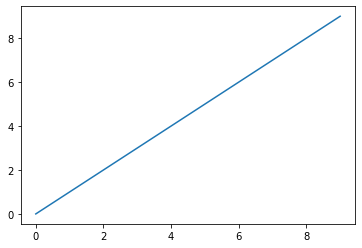

In [11]:
data = np.arange(10)
plt.plot(data)

[]

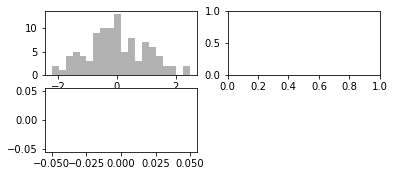

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
# plt.subplots_adjust(wspace=0,hspace=0)
plt.plot()

In [2]:
codes=['002677.SZ','002424.SZ']
error, sec_close = w.wsd(codes, "close", "1999-01-01", "2023-03-16", "TradingCalendar=SZSE", usedf=True)
sec_close.dropna(how='all', inplace=True)

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

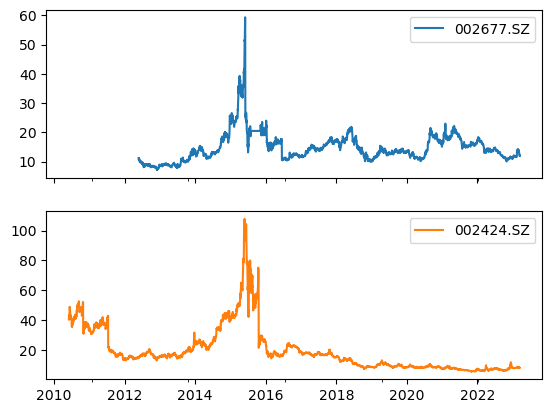

In [3]:
sec_close.plot(subplots=True)

<AxesSubplot:>

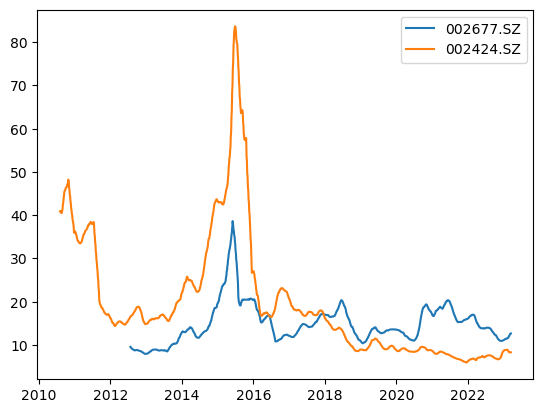

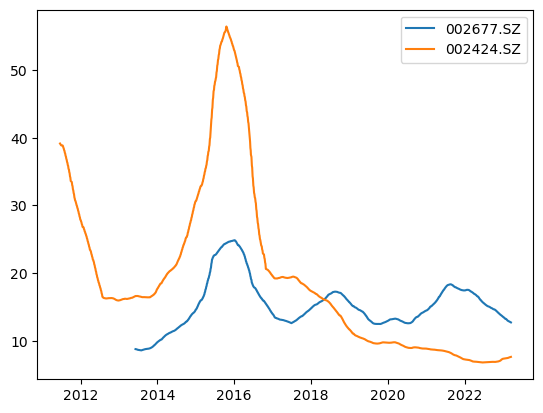

In [4]:
sma_short = sec_close.rolling(window=42).mean()  # 短期
sma_long = sec_close.rolling(window=252).mean()  # 长期
sma_short.plot()
sma_long.plot()

In [27]:
positions=pd.DataFrame(np.where(sma_short>sma_long,1,-1),columns=sma_short.columns,index=sma_short.index)

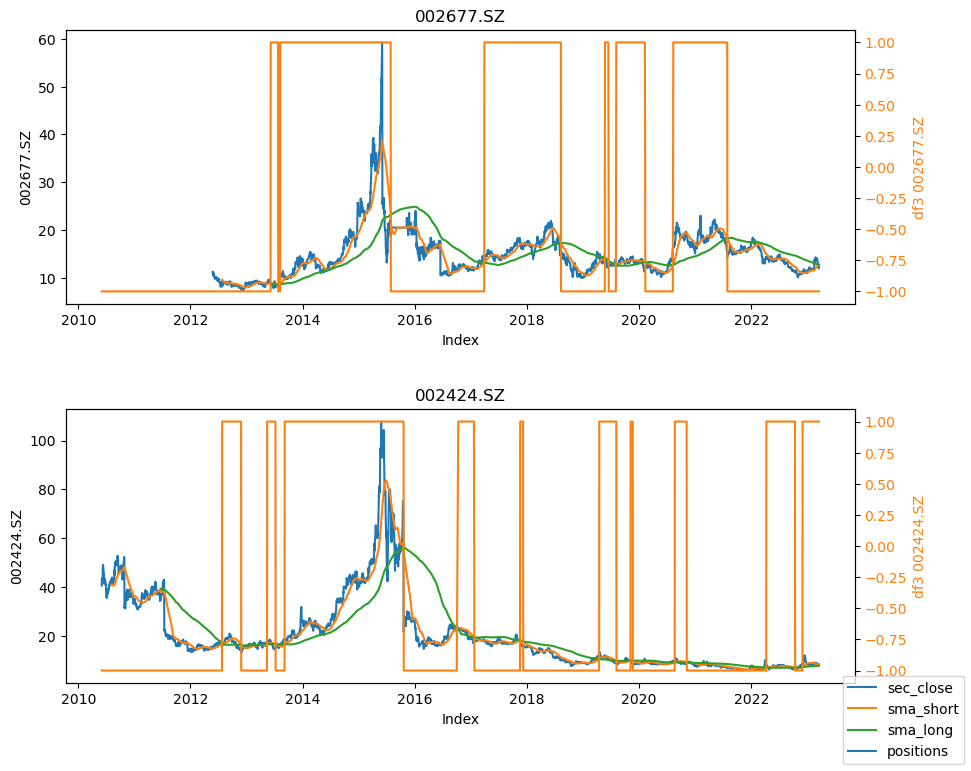

In [31]:
# 将所有数据框的列按照名称进行匹配，存储在一个字典中
col_dict = {}
for col_name in sec_close.columns:
    col_dict[col_name] = [sec_close[col_name], sma_short[col_name], sma_long[col_name], positions[col_name]]

# 创建子图
n_cols = 1
n_rows = len(col_dict)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 8))
axes = axes.flatten()

# 循环添加数据
for i, (name, cols) in enumerate(col_dict.items()):
    for j, col in enumerate(cols):
        # 创建子图
        ax = axes[i]
        if j == len(cols) - 1:
            # 创建第二个y轴
            ax2 = ax.twinx()
            ax2.plot(col, label=name, color='tab:orange')
            ax2.set_ylabel('df3 ' + name, color='tab:orange')
            ax2.tick_params(axis='y', labelcolor='tab:orange')
        else:
            ax.plot(col, label=name)

    ax.set_title(name)
    ax.set_xlabel('Index')
    ax.set_ylabel(name)

# 添加图例
fig.legend(labels=['sec_close', 'sma_short','sma_long','positions'], loc='lower right')

# 调整子图间距
fig.tight_layout(pad=3.0)

# 显示图形
plt.show()


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

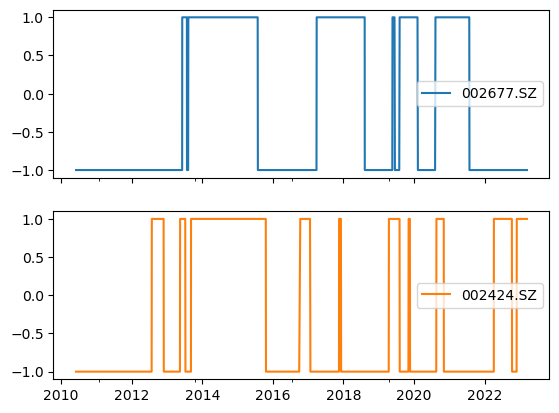

In [28]:
positions.plot(subplots=True)